In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

results = {}

# Importing Data

In [2]:
data_source_url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv"
cols = ['airline_sentiment','text']
data = pd.read_csv(data_source_url, usecols=cols)
data.rename(columns = {'airline_sentiment':'emotion'}, inplace = True)

# data_source_url = "isear.xlsx"
# cols = ['SIT', 'Field1']
# data = pd.read_excel(data_source_url, usecols=cols, engine='openpyxl')

# data_source_url = "dataset/train.txt"
# data = pd.read_csv(data_source_url, header=None, sep=';', names=['text', 'emotion'], encoding='utf-8')
data.head()

,emotion,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [3]:
data.describe()

,emotion,text
count,14640,14640
unique,3,14427
top,negative,@united thanks
freq,9178,6


<AxesSubplot:ylabel='emotion'>

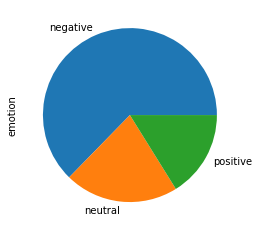

In [4]:
data['emotion'].value_counts().plot.pie()

# Preprocessing

In [5]:
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [6]:
def Toeknization(string):
    words=nltk.word_tokenize(string)
    return ' '.join(words)


def Removestopwords(string):
    for i in punctuation:
        string=string.replace(i,'')
    words=nltk.word_tokenize(string)
    k=[]
    eng_stop=stopwords.words('english')
    for each in words:
        if each not in eng_stop:
            k.append(each.lower())
    return ' '.join(k)


def Lammetization(string):
    words=nltk.word_tokenize(string)
    ws=WordNetLemmatizer()
    l=[]
    for each in words:
        l.append(ws.lemmatize(each))
    return ' '.join(l)

In [7]:
def Refine(string):
    return Lammetization(Removestopwords(Toeknization(string)))

In [8]:
data['processed_text']=data['text'].apply(lambda x: Refine(x))

In [9]:
data.head()

,emotion,text,processed_text
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercial experience...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i nt today must mean i need take...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


## Extra Column Adding (Numericals)

In [10]:
def GetPOSTags(string):
    words=nltk.word_tokenize(string)
    tags=nltk.pos_tag(words)
    return tags

In [11]:
def NounCount(string):
    ntg=GetPOSTags(string)
    allForms=['NN','NNP','NNS','NNPS']
    count=0
    for word,tag in ntg:
        if tag in allForms:
            count+=1
    return count
            
def PronounsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['PRP','PRP$']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Verbs    
def VerbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['VB','VBP','VBZ','VBG','VBD','VBN']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adjectives    
def AdjectivesCount(string):
    POSTags=GetPOSTags(string)
    allForms=['JJ','JJR','JJS']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adverbs    
def AdverbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['RB','RBR']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

In [12]:
# nltk.download('averaged_perceptron_tagger')
data['Noun_count']=data['processed_text'].apply(lambda x: NounCount(x))

In [13]:
data['ProNoun_count']=data['processed_text'].apply(lambda x: PronounsCount(x))

In [14]:
data['Verb_count']=data['processed_text'].apply(lambda x: VerbsCount(x))

In [15]:
data['Adjectives_count']=data['processed_text'].apply(lambda x: AdjectivesCount(x))

In [16]:
data['Adverbs_count']=data['processed_text'].apply(lambda x: AdverbsCount(x))

In [17]:
# Final dataset looks like
data.head()

,emotion,text,processed_text,Noun_count,ProNoun_count,Verb_count,Adjectives_count,Adverbs_count
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said,2,0,1,0,0
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercial experience...,3,0,0,2,0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i nt today must mean i need take...,4,0,4,1,0
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,6,0,0,4,1
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,2,0,0,2,1


# Global Variable

In [18]:
gb_num_words=1000
gb_output_dim=50
gb_epochs=30
gb_n_hidden_layers=25
gb_trainable=False
gd_dense = 3
gb_test_size=0.3
dataset_type = 'Dataset 2'

# Importing Wordembedding layers

In [19]:
con=open('glove.6B.50d.txt',encoding='utf-8')

In [20]:
index={}
for words in con:
    values=words.split()
    word=values[0]
    vect=np.asarray(values[1:],dtype='float32')
    index[word]=vect

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [22]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
tokens=Tokenizer(num_words=gb_num_words)

# Using Embedding layers without numerical columns

In [23]:
from sklearn.model_selection import train_test_split

x=data['text']
y=data['emotion']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [24]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [26]:
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [27]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

# RNN Model 

## RNN Model without Numerical Columns

In [28]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
321/321 [==============================] - 3s 7ms/step - loss: 0.8636 - accuracy: 0.6397 - val_loss: 0.8157 - val_accuracy: 0.6437
Epoch 2/30
321/321 [==============================] - 1s 4ms/step - loss: 0.7595 - accuracy: 0.6870 - val_loss: 0.7532 - val_accuracy: 0.6810
Epoch 3/30
321/321 [==============================] - 2s 7ms/step - loss: 0.7226 - accuracy: 0.7068 - val_loss: 0.7322 - val_accuracy: 0.6883
Epoch 4/30
321/321 [==============================] - 2s 7ms/step - loss: 0.6898 - accuracy: 0.7241 - val_loss: 0.7040 - val_accuracy: 0.7104
Epoch 5/30
321/321 [==============================] - 2s 7ms/step - loss: 0.6724 - accuracy: 0.7270 - val_loss: 0.6859 - val_accuracy: 0.7316
Epoch 6/30
321/321 [==============================] - 2s 6ms/step - loss: 0.6613 - accuracy: 0.7323 - val_loss: 0.6868 - val_accuracy: 0.7284
Epoch 7/30
321/321 [==============================] - 2s 6ms/step - loss: 0.6530 - accuracy: 0.7385 - val_loss: 0.6606 - val_accuracy: 0.7336
Epoch 

In [30]:
results_rnn=pd.DataFrame(model.history.history)
results_rnn

,loss,accuracy,val_loss,val_accuracy
0,0.863633,0.639735,0.815701,0.643670
1,0.759498,0.686963,0.753233,0.681011
2,0.722622,0.706772,0.732188,0.688297
3,0.689785,0.724141,0.704034,0.710383
4,0.672436,0.726971,0.685889,0.731557
5,0.661311,0.732338,0.686767,0.728370
6,0.652958,0.738486,0.660593,0.733607
7,0.640825,0.740535,0.659733,0.734745
8,0.639962,0.739754,0.654105,0.741576
9,0.635544,0.745219,0.658228,0.737477


In [31]:
results['RNN'] = results_rnn['val_accuracy'].mean()
results_rnn['val_accuracy'].mean()

0.7281724333763122

## RNN Model with Numerical Columns

In [32]:
l=['processed_text', 'ProNoun_count', 'Verb_count', 'Adjectives_count', 'Adverbs_count', 'Noun_count']

In [33]:
x=data[l]
y=data['emotion']

In [34]:
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [35]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [36]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [37]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [38]:
y_train.shape

(10248, 3)

In [39]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [40]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))

In [41]:
final_xtrain=np.hstack((x_train_text,x_train_num))

In [42]:
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))
final_xtest=np.hstack((x_test_text,x_test_num))

In [43]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
321/321 [==============================] - 3s 6ms/step - loss: 0.8869 - accuracy: 0.6281 - val_loss: 0.8629 - val_accuracy: 0.6425
Epoch 2/30
321/321 [==============================] - 2s 5ms/step - loss: 0.8555 - accuracy: 0.6422 - val_loss: 0.8407 - val_accuracy: 0.6466
Epoch 3/30
321/321 [==============================] - 2s 6ms/step - loss: 0.8220 - accuracy: 0.6568 - val_loss: 0.8176 - val_accuracy: 0.6562
Epoch 4/30
321/321 [==============================] - 2s 5ms/step - loss: 0.8047 - accuracy: 0.6643 - val_loss: 0.8107 - val_accuracy: 0.6623
Epoch 5/30
321/321 [==============================] - 2s 5ms/step - loss: 0.7926 - accuracy: 0.6668 - val_loss: 0.8053 - val_accuracy: 0.6598
Epoch 6/30
321/321 [==============================] - 2s 5ms/step - loss: 0.7796 - accuracy: 0.6740 - val_loss: 0.8026 - val_accuracy: 0.6667
Epoch 7/30
321/321 [==============================] - 2s 5ms/step - loss: 0.7703 - accuracy: 0.6796 - val_loss: 0.8357 - val_accuracy: 0.6261
Epoch 

In [45]:
results_rnn_1=pd.DataFrame(model.history.history)
results_rnn_1

,loss,accuracy,val_loss,val_accuracy
0,0.886908,0.628123,0.862879,0.642532
1,0.855503,0.642174,0.840747,0.646630
2,0.822045,0.656811,0.817636,0.656193
3,0.804744,0.664325,0.810684,0.662341
4,0.792645,0.666764,0.805278,0.659836
5,0.779641,0.673985,0.802594,0.666667
6,0.770262,0.679645,0.835744,0.626138
7,0.764739,0.681206,0.789734,0.671903
8,0.757530,0.685988,0.788683,0.676913
9,0.747276,0.689891,0.786907,0.675091


In [46]:
results['RNN_1'] = results_rnn_1['val_accuracy'].mean()
results_rnn_1['val_accuracy'].mean()

0.6723588307698568

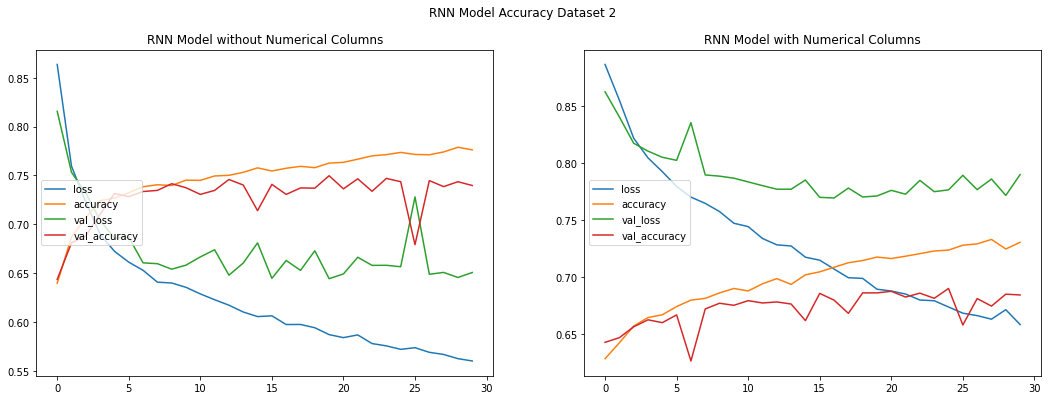

In [47]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('RNN Model Accuracy {}'.format(dataset_type))
ax1.plot(results_rnn)
ax1.set_title("RNN Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_rnn_1)
ax2.set_title("RNN Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

# LSTM Model

## LSTM Model without Numerical Data

In [48]:
x=data['text']
y=data['emotion']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [49]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [50]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [51]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [52]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
321/321 [==============================] - 5s 9ms/step - loss: 0.7795 - accuracy: 0.6728 - val_loss: 0.6728 - val_accuracy: 0.7304
Epoch 2/30
321/321 [==============================] - 3s 9ms/step - loss: 0.6541 - accuracy: 0.7388 - val_loss: 0.6321 - val_accuracy: 0.7459
Epoch 3/30
321/321 [==============================] - 3s 10ms/step - loss: 0.6201 - accuracy: 0.7514 - val_loss: 0.6132 - val_accuracy: 0.7557
Epoch 4/30
321/321 [==============================] - 3s 9ms/step - loss: 0.5993 - accuracy: 0.7571 - val_loss: 0.6006 - val_accuracy: 0.7564
Epoch 5/30
321/321 [==============================] - 3s 8ms/step - loss: 0.5819 - accuracy: 0.7650 - val_loss: 0.6311 - val_accuracy: 0.7395
Epoch 6/30
321/321 [==============================] - 3s 8ms/step - loss: 0.5698 - accuracy: 0.7703 - val_loss: 0.5979 - val_accuracy: 0.7650
Epoch 7/30
321/321 [==============================] - 2s 8ms/step - loss: 0.5603 - accuracy: 0.7755 - val_loss: 0.5960 - val_accuracy: 0.7605
Epoch

In [54]:
results_lstm=pd.DataFrame(model.history.history)
results_lstm

,loss,accuracy,val_loss,val_accuracy
0,0.779543,0.672814,0.672786,0.730419
1,0.654098,0.738778,0.632101,0.745902
2,0.620094,0.751366,0.613225,0.755692
3,0.599264,0.757123,0.600560,0.756375
4,0.581854,0.765027,0.631139,0.739526
5,0.569794,0.770297,0.597903,0.765027
6,0.560260,0.775468,0.596018,0.760474
7,0.545611,0.782006,0.587994,0.762978
8,0.537921,0.783665,0.596783,0.766621
9,0.528923,0.784738,0.581373,0.771175


In [55]:
results['LSTM'] = results_lstm['val_accuracy'].mean()
results_lstm['val_accuracy'].mean()

0.7615133663018544

## LSTM Model with Numerical Data

In [56]:
x=data[l]
y=data['emotion']
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [57]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [58]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [59]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [60]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [61]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))

In [62]:
final_xtrain=np.hstack((x_train_text,x_train_num))
final_xtest=np.hstack((x_test_text,x_test_num))

In [63]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
321/321 [==============================] - 6s 11ms/step - loss: 0.8479 - accuracy: 0.6350 - val_loss: 0.8087 - val_accuracy: 0.6596
Epoch 2/30
321/321 [==============================] - 4s 11ms/step - loss: 0.7830 - accuracy: 0.6680 - val_loss: 0.7750 - val_accuracy: 0.6680
Epoch 3/30
321/321 [==============================] - 3s 10ms/step - loss: 0.7539 - accuracy: 0.6796 - val_loss: 0.7531 - val_accuracy: 0.6897
Epoch 4/30
321/321 [==============================] - 3s 10ms/step - loss: 0.7307 - accuracy: 0.6974 - val_loss: 0.7333 - val_accuracy: 0.6999
Epoch 5/30
321/321 [==============================] - 3s 10ms/step - loss: 0.7039 - accuracy: 0.7051 - val_loss: 0.7088 - val_accuracy: 0.7099
Epoch 6/30
321/321 [==============================] - 4s 11ms/step - loss: 0.6791 - accuracy: 0.7176 - val_loss: 0.6942 - val_accuracy: 0.7158
Epoch 7/30
321/321 [==============================] - 3s 10ms/step - loss: 0.6591 - accuracy: 0.7273 - val_loss: 0.6811 - val_accuracy: 0.7250

In [65]:
results_lstm_1=pd.DataFrame(model.history.history)
results_lstm_1

,loss,accuracy,val_loss,val_accuracy
0,0.847934,0.634953,0.808654,0.659608
1,0.782980,0.668033,0.774980,0.668033
2,0.753914,0.679645,0.753138,0.689663
3,0.730698,0.697404,0.733334,0.699909
4,0.703860,0.705113,0.708773,0.709927
5,0.679119,0.717603,0.694224,0.715847
6,0.659091,0.727264,0.681070,0.724954
7,0.640786,0.735265,0.685028,0.730191
8,0.626775,0.746194,0.664256,0.736794
9,0.609959,0.752635,0.671169,0.723361


In [66]:
results['LSTM_1'] = results_lstm_1['val_accuracy'].mean()
results_lstm_1['val_accuracy'].mean()

0.7251669744650523

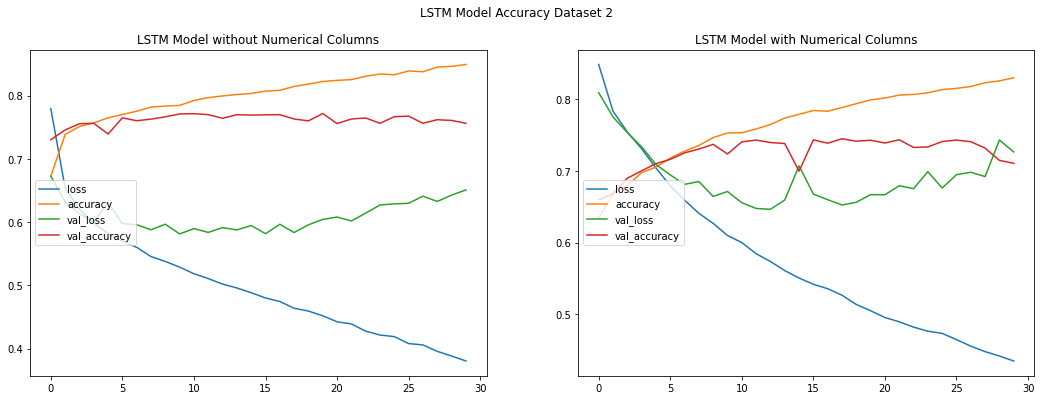

In [67]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('LSTM Model Accuracy {}'.format(dataset_type))
ax1.plot(results_lstm)
ax1.set_title("LSTM Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_lstm_1)
ax2.set_title("LSTM Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

# Hybrid Model (LSTM + RNN)

## Hybrid Model without Numerical Data

In [68]:
x=data['text']
y=data['emotion']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [69]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [70]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [71]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [72]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers,return_sequences=True))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
321/321 [==============================] - 6s 12ms/step - loss: 0.7869 - accuracy: 0.6755 - val_loss: 0.6930 - val_accuracy: 0.7300
Epoch 2/30
321/321 [==============================] - 3s 11ms/step - loss: 0.6674 - accuracy: 0.7287 - val_loss: 0.6621 - val_accuracy: 0.7354
Epoch 3/30
321/321 [==============================] - 3s 11ms/step - loss: 0.6290 - accuracy: 0.7467 - val_loss: 0.6394 - val_accuracy: 0.7477
Epoch 4/30
321/321 [==============================] - 3s 11ms/step - loss: 0.6118 - accuracy: 0.7531 - val_loss: 0.6307 - val_accuracy: 0.7464
Epoch 5/30
321/321 [==============================] - 5s 16ms/step - loss: 0.5898 - accuracy: 0.7629 - val_loss: 0.6145 - val_accuracy: 0.7550
Epoch 6/30
321/321 [==============================] - 5s 16ms/step - loss: 0.5739 - accuracy: 0.7664 - val_loss: 0.6151 - val_accuracy: 0.7536
Epoch 7/30
321/321 [==============================] - 5s 17ms/step - loss: 0.5564 - accuracy: 0.7768 - val_loss: 0.6063 - val_accuracy: 0.7546

In [74]:
results_hybrid=pd.DataFrame(model.history.history)
results_hybrid

,loss,accuracy,val_loss,val_accuracy
0,0.786908,0.675546,0.693004,0.729964
1,0.667415,0.728728,0.662125,0.735428
2,0.628997,0.746682,0.639399,0.747723
3,0.611769,0.753123,0.630651,0.746357
4,0.589797,0.762881,0.614526,0.755009
5,0.573892,0.766393,0.615130,0.753643
6,0.556414,0.776834,0.606308,0.754554
7,0.546182,0.781421,0.610667,0.756375
8,0.534843,0.786495,0.606714,0.758652
9,0.521808,0.793228,0.610692,0.755692


In [75]:
results['Hybrid'] = results_hybrid['val_accuracy'].mean()
results_hybrid['val_accuracy'].mean()

0.7462583541870117

## Hybrid Model with Numerical Data


In [76]:
x=data[l]
y=data['emotion']
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [77]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [78]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [79]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [80]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [81]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))

In [82]:
final_xtrain=np.hstack((x_train_text,x_train_num))
final_xtest=np.hstack((x_test_text,x_test_num))

In [83]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [84]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers,return_sequences=True))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
321/321 [==============================] - 7s 16ms/step - loss: 0.7710 - accuracy: 0.6763 - val_loss: 0.7024 - val_accuracy: 0.7143
Epoch 2/30
321/321 [==============================] - 6s 18ms/step - loss: 0.6578 - accuracy: 0.7258 - val_loss: 0.6671 - val_accuracy: 0.7306
Epoch 3/30
321/321 [==============================] - 5s 15ms/step - loss: 0.6200 - accuracy: 0.7437 - val_loss: 0.6348 - val_accuracy: 0.7423
Epoch 4/30
321/321 [==============================] - 5s 15ms/step - loss: 0.5929 - accuracy: 0.7563 - val_loss: 0.6178 - val_accuracy: 0.7468
Epoch 5/30
321/321 [==============================] - 5s 15ms/step - loss: 0.5750 - accuracy: 0.7603 - val_loss: 0.6074 - val_accuracy: 0.7568
Epoch 6/30
321/321 [==============================] - 5s 15ms/step - loss: 0.5570 - accuracy: 0.7729 - val_loss: 0.6231 - val_accuracy: 0.7489
Epoch 7/30
321/321 [==============================] - 6s 17ms/step - loss: 0.5460 - accuracy: 0.7757 - val_loss: 0.6069 - val_accuracy: 0.7536

In [86]:
results_hybrid_1=pd.DataFrame(model.history.history)
results_hybrid_1

,loss,accuracy,val_loss,val_accuracy
0,0.770967,0.676327,0.702406,0.714253
1,0.657799,0.725800,0.667149,0.730647
2,0.620031,0.743657,0.634829,0.742259
3,0.592894,0.756343,0.617765,0.746812
4,0.574990,0.760343,0.607433,0.756831
5,0.557000,0.772931,0.623114,0.748862
6,0.546042,0.775664,0.606865,0.753643
7,0.530252,0.779957,0.612594,0.758880
8,0.520130,0.787276,0.614358,0.754554
9,0.504862,0.795375,0.608332,0.757058


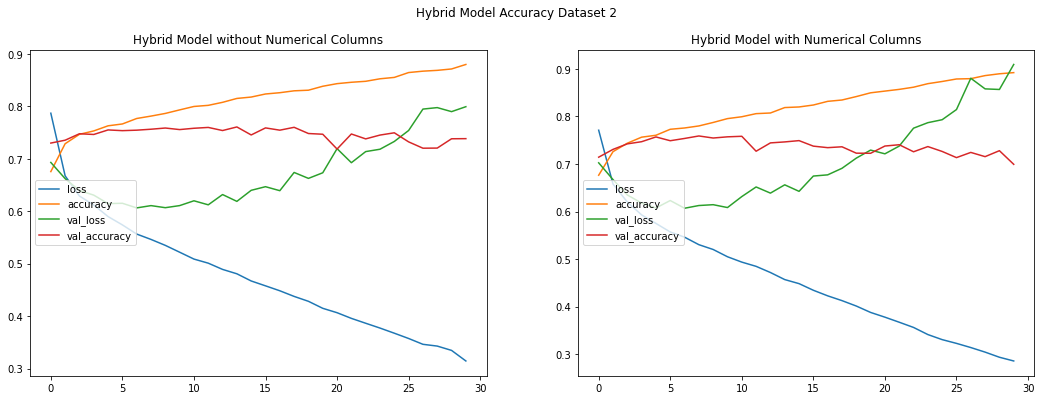

In [87]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Hybrid Model Accuracy {}'.format(dataset_type))
ax1.plot(results_hybrid)
ax1.set_title("Hybrid Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_hybrid_1)
ax2.set_title("Hybrid Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

In [88]:
results['Hybrid_1'] = results_hybrid_1['val_accuracy'].mean()
results_hybrid_1['val_accuracy'].mean()

0.7362780769666036

# Results of all models

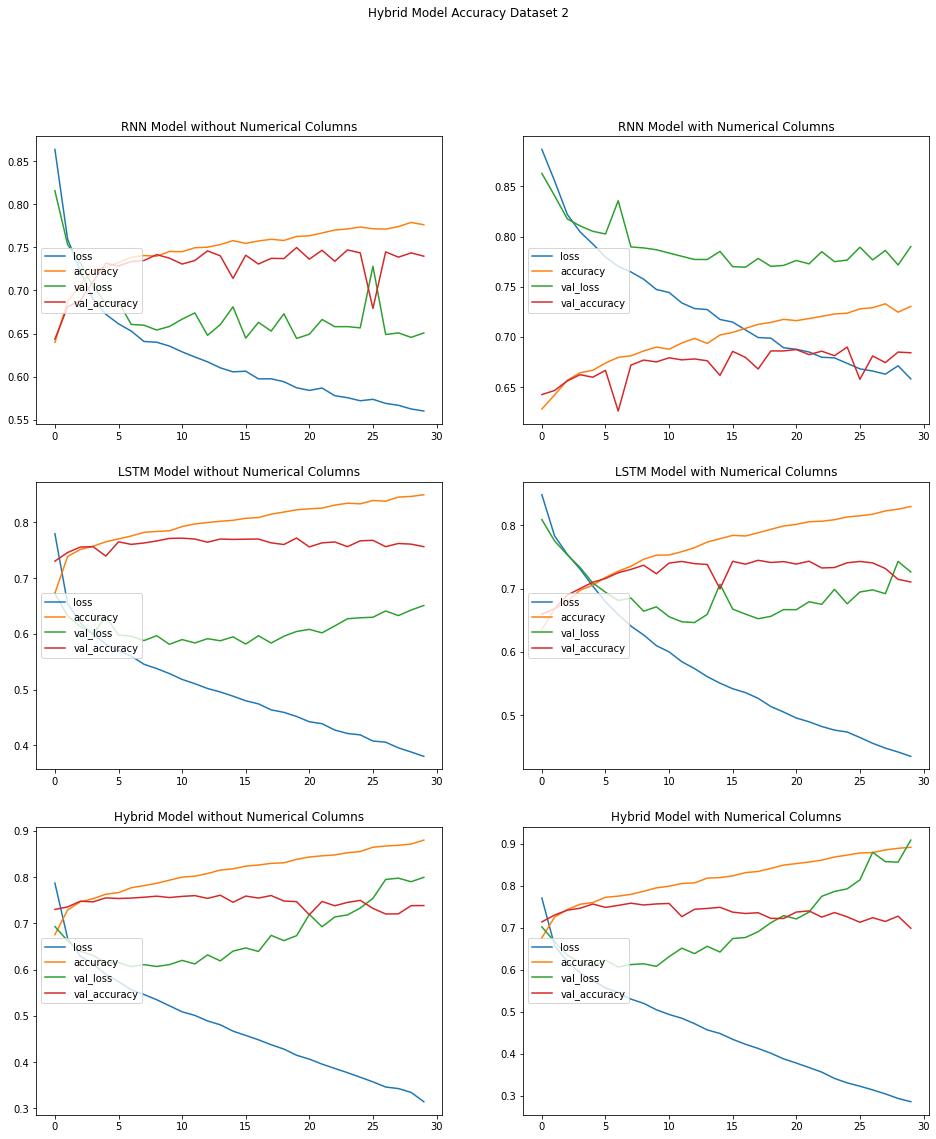

In [89]:
fig, axis = plt.pyplot.subplots(3, 2, figsize=(16, 18))

# fig.suptitle('Model Accuracy')
fig.suptitle('Hybrid Model Accuracy {}'.format(dataset_type))
axis[0, 0].plot(results_rnn)
axis[0, 0].set_title("RNN Model without Numerical Columns")
axis[0, 0].legend(results_rnn.columns.values, loc='center left')
axis[0, 1].plot(results_rnn_1)
axis[0, 1].set_title("RNN Model with Numerical Columns")
axis[0, 1].legend(results_rnn.columns.values, loc='center left')
axis[1, 0].plot(results_lstm)
axis[1, 0].set_title("LSTM Model without Numerical Columns")
axis[1, 0].legend(results_rnn.columns.values, loc='center left')
axis[1, 1].plot(results_lstm_1)
axis[1, 1].set_title("LSTM Model with Numerical Columns")
axis[1, 1].legend(results_rnn.columns.values, loc='center left')
axis[2, 0].plot(results_hybrid)
axis[2, 0].set_title("Hybrid Model without Numerical Columns")
axis[2, 0].legend(results_rnn.columns.values, loc='center left')
axis[2, 1].plot(results_hybrid_1)
axis[2, 1].set_title("Hybrid Model with Numerical Columns")
axis[2, 1].legend(results_rnn.columns.values, loc='center left')

In [90]:
print("Number of Words -", gb_num_words ," | Epochs - ", gb_epochs ," | Hidden Layer - ",gb_n_hidden_layers)
print("Dataset - ", data_source_url)
print("RNN")
print(results_rnn[-1:])
print("RNN_1")
print(results_rnn_1[-1:])
print("LSTM")
print(results_lstm[-1:])
print("LSTM_1")
print(results_lstm_1[-1:])
print("Hybrid")
print(results_hybrid[-1:])
print("Hybrid_1")
print(results_hybrid_1[-1:])

Number of Words - 1000  | Epochs -  30  | Hidden Layer -  25
Dataset -  https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv
RNN
        loss  accuracy  val_loss  val_accuracy
29  0.560163  0.776249  0.650713      0.739754
RNN_1
        loss  accuracy  val_loss  val_accuracy
29  0.658171  0.730484   0.79003      0.684199
LSTM
        loss  accuracy  val_loss  val_accuracy
29  0.380505  0.849434  0.650964      0.756375
LSTM_1
        loss  accuracy  val_loss  val_accuracy
29  0.435301   0.82943  0.726184      0.710383
Hybrid
       loss  accuracy  val_loss  val_accuracy
29  0.31436  0.879879  0.799339      0.738388
Hybrid_1
        loss  accuracy  val_loss  val_accuracy
29  0.285686  0.892076  0.909237      0.699226


In [91]:
for key in results:
    print(key, '->', results[key])

RNN -> 0.7281724333763122
RNN_1 -> 0.6723588307698568
LSTM -> 0.7615133663018544
LSTM_1 -> 0.7251669744650523
Hybrid -> 0.7462583541870117
Hybrid_1 -> 0.7362780769666036


In [92]:
# https://www.javacodemonk.com/difference-between-loss-accuracy-validation-loss-validation-accuracy-in-keras-ff358faa

In [93]:
import tensorflow as tf
print(tf.__version__)

2.5.0
